# Counting Objects Based on Density

## Setup

In [4]:
import matplotlib.pylab as plt
import numpy as np
import scipy.ndimage as ndimage
from skimage import draw

import tensorflow as tf
from tensorflow import keras
from keras import (
    Sequential,
    layers,
    
)

In [3]:
print(f'Tensorflow version: {tf.version.VERSION}')
device_name = tf.test.gpu_device_name()

if device_name == '':
    raise SystemError('No GPU found')
else:
    print(f'GPU found at {device_name}')

Tensorflow version: 2.9.1
GPU found at /device:GPU:0


In [5]:
FULL_IMG_HEIGHT = 512
FULL_IMG_WIDTH = 512
IMG_CHANNELS = 3
PATCH_HEIGHT = 32
PATCH_WIDTH = 32
INPUT_HEIGHT = PATCH_HEIGHT * 2
INPUT_WIDTH = PATCH_WIDTH * 2

## Image and Patch Generation Functions

In [10]:
def generate_image(with_intermediates=False):
    background = np.zeros([FULL_IMG_HEIGHT, FULL_IMG_WIDTH, IMG_CHANNELS])
    background[np.random.rand(FULL_IMG_HEIGHT, FULL_IMG_WIDTH) < 0.3, 1] = 1
    background = ndimage.gaussian_filter(background, sigma=(5, 5, 0), order=0)

    # Between 25 and 50 berries randomly placed
    num_berries = np.random.randint(25, 75)
    berry_cx = np.random.randint(0, FULL_IMG_WIDTH, size=num_berries)
    berry_cy = np.random.randint(0, FULL_IMG_HEIGHT, size=num_berries)
    label = np.zeros([FULL_IMG_WIDTH, FULL_IMG_HEIGHT])
    label[berry_cx, berry_cy] = 1

    # Draw the berries which are 10 px in radius
    berries = np.zeros([FULL_IMG_HEIGHT, FULL_IMG_WIDTH])
    for idx in range(len(berry_cx)):
        rr, cc = draw.disk((berry_cx[idx], berry_cy[idx]), radius=20, shape=berries.shape)
        berries[rr, cc] = 1

    # Add berries to the background
    img = np.copy(background)
    img[berries > 0] = [1, 0, 0]  # Red color

    if with_intermediates:
        print(f"{num_berries} berries simulated.")
        return background, berries, img, label
    else:
        return img, label


46 berries simulated.


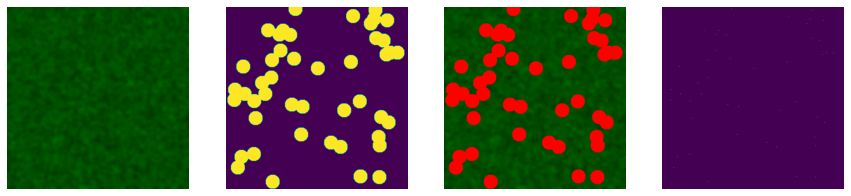

In [16]:
images = generate_image(True)
_, ax = plt.subplots(1, len(images), figsize=(15, 5))
for idx, img in enumerate(images):
    ax[idx].imshow(img)
    ax[idx].axis("off")
